## Work process :

<ol>
    <li>Importing Libraries</li>
    <li>
        Dataset preparation and preprocessing
        <ul>
            <li>Data collection</li>
            <li>Data visualization</li>
            <li>Data selection</li>
            <li>Dataset splitting</li>
            <li>Data Cleaning</li>
            <li>Data formatting</li>
            <li>Data Scaling</li>
        </ul>
    </li>
    <li>Modeling and Validation</li>
    <li>Evaluating the model using  test set</li>
</ol>

## Importing Libraries

In [353]:
# Libraries

# EDA 
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# -Pre-Processing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# -Model Selection
from sklearn.model_selection import train_test_split


# -Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.svm import SVC

# Model validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve 

#Hyper-parameter Hyper-parameter
from sklearn.model_selection import GridSearchCV

# Deal with unbalanced data
from imblearn.under_sampling import RandomUnderSampler

# -Metrics
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score

%matplotlib inline

In [257]:

#Import of very relevant data 

course_ratings = pd.read_csv('365_database/365_course_ratings.csv')

student_info = pd.read_csv('365_database/365_student_info.csv')

student_learning = pd.read_csv('365_database/365_student_learning.csv')

student_purchases = pd.read_csv('365_database/365_student_purchases.csv')

# Less relevant data

#course_info = pd.read_csv('365_database/365_course_info.csv')

#exam_info = pd.read_csv('365_database/365_exam_info.csv')

#quiz_info = pd.read_csv('365_database/365_quiz_info.csv')

#student_engagement = pd.read_csv('365_database/365_student_engagement.csv')

#student_exams = pd.read_csv('365_database/365_student_exams.csv')

#student_hub_questions = pd.read_csv('365_database/365_student_hub_questions.csv')

#student_quizzes =pd.read_csv('365_database/365_student_quizzes.csv')


## Dataset preparation and preprocessing

### Data collection

In [258]:
course_ratings.head()

,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


In [259]:
student_info.head()

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


In [260]:
student_learning.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [261]:
student_purchases.head()

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


In [262]:
# Merge differents data to build a data set 

In [263]:
df = pd.merge(student_learning, student_purchases, how='left', on='student_id').merge(student_info, how='left', on='student_id').merge(course_ratings, how='left', on=['student_id', 'course_id'])

In [264]:
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,purchase_type,date_purchased,student_country,date_registered,course_rating,date_rated
0,258798,23,0.3,2022-01-01,NaN,NaN,NaN,IN,2022-01-01,NaN,NaN
1,258800,2,12.9,2022-04-01,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
2,258800,7,46.8,2022-01-03,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
3,258800,7,4.3,2022-01-04,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
4,258800,7,31.7,2022-01-07,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN


In [265]:
df['purchase'] = df['purchase_type']

df.drop('purchase_type', axis=1, inplace=True)

dic = {'Annual':1, 'Monthly':1, 'Quarterly': 1, np.nan: 0}

df['purchase'] = df['purchase'].map(dic)

df['purchase'] = df['purchase'].astype('int')

In [266]:
df.head(10)

,student_id,course_id,minutes_watched,date_watched,purchase_id,date_purchased,student_country,date_registered,course_rating,date_rated,purchase
0,258798,23,0.3,2022-01-01,NaN,NaN,IN,2022-01-01,NaN,NaN,0
1,258800,2,12.9,2022-04-01,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,258800,7,46.8,2022-01-03,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,258800,7,4.3,2022-01-04,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,258800,7,31.7,2022-01-07,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
5,258800,7,61.6,2022-01-05,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
6,258800,7,45.1,2022-01-06,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
7,258800,11,0.5,2022-02-21,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
8,258800,11,1.1,2022-02-22,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
9,258800,14,4.0,2022-01-28,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1


In [267]:
df.shape

(87633, 11)

In [268]:
# the dataset has 87633 sample, not bad 😋 and 12 columns

In [269]:
df.isnull().sum()

student_id             0
course_id              0
minutes_watched        0
date_watched           0
purchase_id        27204
date_purchased     27204
student_country       44
date_registered        0
course_rating      71054
date_rated         71054
purchase               0
dtype: int64

In [270]:
# A lot of missing values, this is normal due to the merge 😐

In [271]:
df.dtypes

student_id           int64
course_id            int64
minutes_watched    float64
date_watched        object
purchase_id        float64
date_purchased      object
student_country     object
date_registered     object
course_rating      float64
date_rated          object
purchase             int32
dtype: object

##### Remarks

In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,87633.0,272453.644597,9934.821750,258798.0,263690.0,270486.0,280019.0,295513.0
course_id,87633.0,19.587941,12.274264,2.0,7.0,16.0,24.0,67.0
minutes_watched,87633.0,31.387779,41.174484,0.0,5.4,18.9,42.2,1710.6
purchase_id,60429.0,19469.821112,2054.504091,15781.0,17677.0,19504.0,21243.0,23152.0
course_rating,16579.0,4.795766,0.520219,1.0,5.0,5.0,5.0,5.0
purchase,87633.0,0.689569,0.462673,0.0,0.0,1.0,1.0,1.0


##### Remarks

- Minutes watched 
    *50% of students watched videos of more than 10 min
- Rating Course
    *Most of the students give, This is normal, since the quality of teaching is excellent

### Data Visualisation

In [273]:
counts = df['student_country'].value_counts()

df = df.loc[df['student_country'].isin(counts.index[counts > 10])]

### Data selection

In [274]:
data = df.copy()
data = df.drop(['purchase_id', 'student_id', 'date_purchased'], axis=1)

In [275]:
data.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated,purchase
0,23,0.3,2022-01-01,IN,2022-01-01,NaN,NaN,0
1,2,12.9,2022-04-01,CA,2022-01-01,NaN,NaN,1
2,7,46.8,2022-01-03,CA,2022-01-01,NaN,NaN,1
3,7,4.3,2022-01-04,CA,2022-01-01,NaN,NaN,1
4,7,31.7,2022-01-07,CA,2022-01-01,NaN,NaN,1


In [276]:
data.isna().sum()

course_id              0
minutes_watched        0
date_watched           0
student_country        0
date_registered        0
course_rating      70870
date_rated         70870
purchase               0
dtype: int64

### Data split

In [277]:
X = data.drop('purchase', axis=1)
y = data['purchase']

#### Ckeck if the data is balanced

<AxesSubplot:>

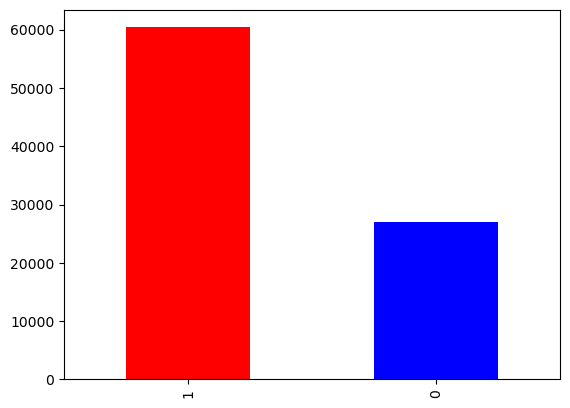

In [278]:
y.value_counts().plot(kind='bar', color=['red', 'blue'])

<p>Our Target is imbalanced, so we have to find you a strategy otherwise there will be risk of overfitting. So to solve this problem there are several techniques but I'm going to use the one of under sample, which will reduce the number of true values than false ones, it's not the best approach but it will allow me to train my models faster because of the reduced amount of data</p>

In [279]:
rsu = RandomUnderSampler()

X_res, y_res = rsu.fit_resample(X, y)

<AxesSubplot:>

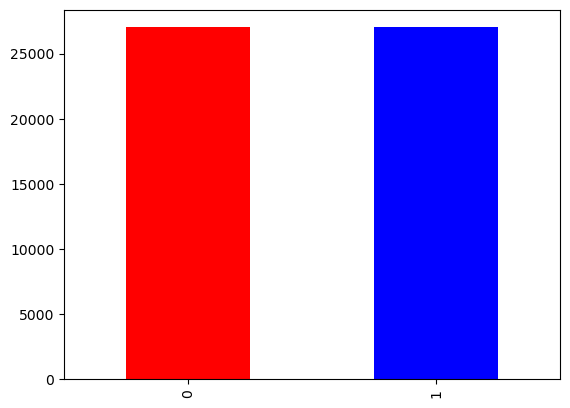

In [280]:
y_res.value_counts().plot(kind='bar', color=['red', 'blue'])

<p>Great Ouw Target is now correct Balanced</p>

In [281]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=365, stratify=y_res)

In [282]:
#check distributions

print(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

0    0.5
1    0.5
Name: purchase, dtype: float64 0    0.5
1    0.5
Name: purchase, dtype: float64


### Cleaning

1 . Inpute Missing Values
- Inpute student_country by most frequent
- Inputer date_rated by most il same in date_registered
- Inpute course_rating by most freqent 

In [283]:
#define strategy

# fit x_train and transform x_test data

x_train['date_rated'].fillna(x_train['date_registered'], inplace=True)

x_test['date_rated'].fillna(x_train['date_registered'], inplace=True)

inputer = SimpleImputer(strategy='most_frequent')

fit = inputer.fit_transform(x_train)

x_train = pd.DataFrame(data = fit, columns=inputer.feature_names_in_)
x_test  = pd.DataFrame(data = inputer.transform(x_test), columns=inputer.feature_names_in_)


In [284]:
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated
0,23,23.3,2022-03-20,NG,2022-03-19,5.0,2022-03-19
1,42,0.6,2022-04-29,IN,2022-04-29,5.0,2022-04-29
2,14,16.0,2022-03-20,IN,2022-03-20,5.0,2022-03-20
3,21,48.8,2022-02-15,UA,2022-01-24,5.0,2022-01-24
4,21,13.0,2022-09-27,SA,2022-02-18,5.0,2022-02-18


In [285]:
# We check if we haven't forgotten something

print("Missing values in train data : \n" , x_train.isnull().sum())
print("Missing values in test data : \n", x_train.isnull().sum())

Missing values in train data : 
 course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64
Missing values in test data : 
 course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64


In [286]:
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated
0,23,23.3,2022-03-20,NG,2022-03-19,5.0,2022-03-19
1,42,0.6,2022-04-29,IN,2022-04-29,5.0,2022-04-29
2,14,16.0,2022-03-20,IN,2022-03-20,5.0,2022-03-20
3,21,48.8,2022-02-15,UA,2022-01-24,5.0,2022-01-24
4,21,13.0,2022-09-27,SA,2022-02-18,5.0,2022-02-18


In [287]:
#Converte date_registered, date_watched,date_purchased to date time
cols = ['date_registered', 'date_watched', 'date_rated']
for i in cols:
    x_train[i] = pd.to_datetime(x_train[i])
    x_test[i] = pd.to_datetime(x_test[i])

In [288]:
x_train.isna().sum()

course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64

### Feature Engineering 

<p> I will create a column that will group the time between the date of recording and the date of viewing the course, 
technically  (date_registered - date_watched) </p>

In [289]:
x_train['period'] = x_train['date_watched'] - x_train['date_registered']
x_test['period'] = x_test['date_watched'] - x_test['date_registered']


x_train['period_bf_rating'] = x_train['date_rated'] - x_train['date_watched']
x_test['period_bf_rating']  = x_test['date_rated'] - x_test['date_watched']


In [290]:
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated,period,period_bf_rating
0,23,23.3,2022-03-20,NG,2022-03-19,5.0,2022-03-19,1 days,-1 days
1,42,0.6,2022-04-29,IN,2022-04-29,5.0,2022-04-29,0 days,0 days
2,14,16.0,2022-03-20,IN,2022-03-20,5.0,2022-03-20,0 days,0 days
3,21,48.8,2022-02-15,UA,2022-01-24,5.0,2022-01-24,22 days,-22 days
4,21,13.0,2022-09-27,SA,2022-02-18,5.0,2022-02-18,221 days,-221 days


In [291]:
x_train.isnull().sum()

course_id           0
minutes_watched     0
date_watched        0
student_country     0
date_registered     0
course_rating       0
date_rated          0
period              0
period_bf_rating    0
dtype: int64

### Encodage

In [292]:
# We are good now, we can scale the data

#define scaler
encoder  = OrdinalEncoder()

label = ['student_country']

x_train[label] = encoder.fit_transform(x_train[label])

x_test[label] = encoder.transform(x_test[label])


In [293]:
# drop date columns
x_train.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)
x_test.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)

# format data in proper format
x_train = x_train.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'period': 'str', 'period_bf_rating': 'str', 'student_country': 'int64'})
x_test  = x_test.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'period': 'str', 'period_bf_rating': 'str', 'student_country': 'int64'})

# convert period (x dates ) to numeric day in int format
x_train['period'] = np.abs((x_train['period'].apply(lambda x : x.split(' ')[0])).astype('int64'))
x_test['period'] = np.abs((x_test['period'].apply(lambda x : x.split(' ')[0])).astype('int64'))

#
x_train['period_bf_rating'] = np.abs((x_train['period_bf_rating'].apply(lambda x : x.split(' ')[0])).astype('int64'))
x_test['period_bf_rating'] = np.abs((x_test['period_bf_rating'].apply(lambda x : x.split(' ')[0])).astype('int64'))

In [294]:
x_train.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,23,23,81,5,1,1
1,42,0,54,5,0,0
2,14,16,54,5,0,0
3,21,48,114,5,22,22
4,21,13,100,5,221,221


In [295]:
x_train.dtypes

course_id           int64
minutes_watched     int64
student_country     int64
course_rating       int64
period              int64
period_bf_rating    int64
dtype: object

In [296]:
x_test.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,7,26,81,5,0,149
1,34,6,116,5,139,66
2,23,36,116,5,21,194
3,23,6,16,5,145,14
4,14,13,116,5,108,33


In [297]:
x_test.dtypes

course_id           int64
minutes_watched     int64
student_country     int64
course_rating       int64
period              int64
period_bf_rating    int64
dtype: object

### Feature Scaling

In [298]:
# define scaler
scaler = MinMaxScaler()

# scale data
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# recreate data frame
x_train_scale = pd.DataFrame(x_train_scale, columns=scaler.feature_names_in_)
x_test_scale = pd.DataFrame(x_test_scale, columns=scaler.feature_names_in_)


In [299]:
# check transformation
x_train_scale.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,0.323077,0.013450,0.653226,1.0,0.003436,0.003436
1,0.615385,0.000000,0.435484,1.0,0.000000,0.000000
2,0.184615,0.009357,0.435484,1.0,0.000000,0.000000
3,0.292308,0.028070,0.919355,1.0,0.075601,0.075601
4,0.292308,0.007602,0.806452,1.0,0.759450,0.759450


In [300]:
# check test data
x_test_scale.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,0.076923,0.015205,0.653226,1.0,0.000000,0.512027
1,0.492308,0.003509,0.935484,1.0,0.477663,0.226804
2,0.323077,0.021053,0.935484,1.0,0.072165,0.666667
3,0.323077,0.003509,0.129032,1.0,0.498282,0.048110
4,0.184615,0.007602,0.935484,1.0,0.371134,0.113402


## Model Building

### First Modeling

In [301]:
# define model
knn  = KNeighborsClassifier(n_neighbors=4)

# fit model
knn.fit(x_train_scale, y_train)

KNeighborsClassifier(n_neighbors=4)

In [302]:
y_predict = knn.predict(x_test_scale)

In [303]:
accuracy_score(y_test, y_predict)

0.6452358926919519

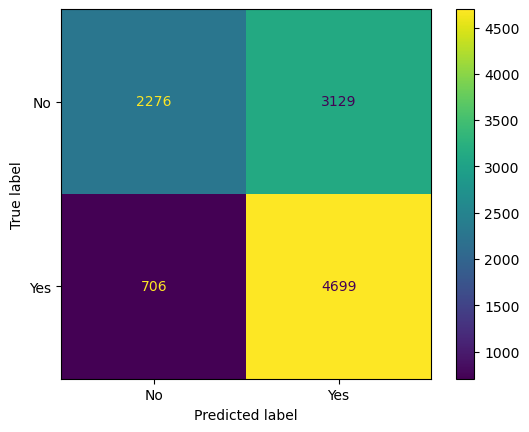

In [304]:
# Good accuracy, but we need to check the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict), display_labels=['No', 'Yes']).plot()

In [305]:
# We can see that the model is not good at predicting the positive class, we need to improve it
# We must improve recall as much as possible

In [306]:
# Check the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.42      0.54      5405
           1       0.60      0.87      0.71      5405

    accuracy                           0.65     10810
   macro avg       0.68      0.65      0.63     10810
weighted avg       0.68      0.65      0.63     10810



In [307]:
# We can use turn hyperparameters to improve the model

### Hyper-parameter tuning

#### Grid search 

In [308]:
## Grid search to find the best parameters
grid_params = { 'n_neighbors': np.arange(1, 10), 
                'weights': ['uniform', 'distance'],
                'p': np.arange(1, 3) }

grid = GridSearchCV(knn, grid_params,scoring='accuracy')

In [309]:
grid.fit(x_train_scale, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': array([1, 2]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [310]:
print("The best parameters are ", grid.best_params_)
print("The best score is ", grid.best_score_)
best_est = grid.best_estimator_

The best parameters are  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
The best score is  0.8644944474975788


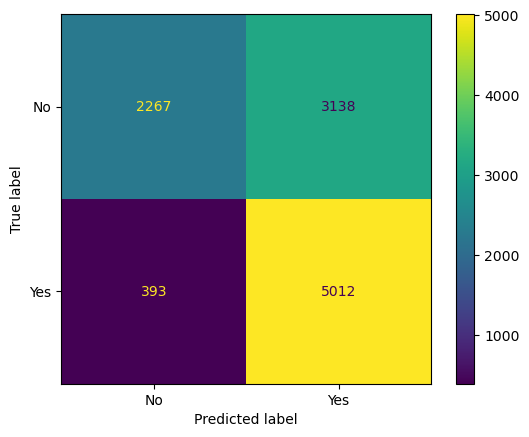

In [336]:
ConfusionMatrixDisplay.from_predictions(y_test, best_est.predict(x_test_scale), display_labels=['No', 'Yes'])

In [312]:
# We can see that the model is better at predicting the positive class
# We can also check the classification report
print(classification_report(y_test, best_est.predict(x_test_scale)))

              precision    recall  f1-score   support

           0       0.85      0.42      0.56      5405
           1       0.61      0.93      0.74      5405

    accuracy                           0.67     10810
   macro avg       0.73      0.67      0.65     10810
weighted avg       0.73      0.67      0.65     10810



In [313]:
#we can try to improve it by using other models

### Train multiple Models

In [334]:
MultipleModels = {'LogisticRegression': LogisticRegression(),
                  'DecisionTreeClassifier': DecisionTreeClassifier(),
                  'RandomForestClassifier': RandomForestClassifier(),
                  'GaussianNB': GaussianNB(),
                  'svm': SVC()}

In [335]:
scores = []
for name, model in MultipleModels.items():
    model.fit(x_train_scale, y_train)
    y_pred = model.predict(x_test_scale)
    scores.append({
        'name': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    })


LogisticRegression
0.7864014801110083
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      5405
           1       0.77      0.82      0.79      5405

    accuracy                           0.79     10810
   macro avg       0.79      0.79      0.79     10810
weighted avg       0.79      0.79      0.79     10810


KNeighborsClassifier
0.6247918593894543
              precision    recall  f1-score   support

           0       0.79      0.34      0.47      5405
           1       0.58      0.91      0.71      5405

    accuracy                           0.62     10810
   macro avg       0.69      0.62      0.59     10810
weighted avg       0.69      0.62      0.59     10810


svm
0.6471785383903793
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      5405
           1       0.59      0.95      0.73      5405

    accuracy                           0.65     10810
   macro avg       0.73  

<p>We can see that the best model is the LogisticRegression, we are going to improve it</p>